In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff
from pathlib import Path

In [ ]:
# Project root
project_root = Path.cwd().parents[0]

images_dir = project_root / "datas" / "Original Images"
masks_dir  = project_root / "datas" / "Original Masks"
nb_images = 22  # 00 to 21

def load_tiff_image(path):
    img = tiff.imread(path)
    if img.ndim == 3:   # takes middle slicee in case of 3D.
        img = img[img.shape[0] // 2]
    return img

In [ ]:
images = []
masks = []

for i in range(nb_images):
    img_path = os.path.join(images_dir, f"image_v2_{i:02d}.tif")
    mask_path = os.path.join(masks_dir,  f"image_v2_mask_{i:02d}.tif")

    img = load_tiff_image(img_path)
    mask = load_tiff_image(mask_path)

    images.append(img)
    masks.append(mask)

    print(f"\n Img/mask Pair {i:02d}:")
    print(f"Image shape: {img.shape}, dtype: {img.dtype}")
    print(f"Image intensity stats:") #not sure if intensity is the right word
    print(f"    Min: {np.min(img):}, Max: {np.max(img):}, Mean: {np.mean(img):}")
    print(f"Mask shape: {mask.shape}, dtype: {mask.dtype}")
    print(f"Mask intensity stats:")  # //
    print(f"    Min: {np.min(mask):}, Max: {np.max(mask):}, Mean: {np.mean(mask):}")


 Img/mask Pair 00:
Image shape: (768, 768), dtype: float32
Image intensity stats:
    Min: -3.5173934520571493e-06, Max: 0.00043277101940475404, Mean: 0.00015297200297936797
Mask shape: (768, 768), dtype: float32
Mask intensity stats:
    Min: -0.0006558112800121307, Max: 0.00043277101940475404, Mean: 0.00011117623216705397

 Img/mask Pair 01:
Image shape: (768, 768), dtype: float32
Image intensity stats:
    Min: -3.0874754884280264e-05, Max: 0.0004225051961839199, Mean: 0.00015832211647648364
Mask shape: (768, 768), dtype: float32
Mask intensity stats:
    Min: -0.00015204670489765704, Max: 0.00039509974885731936, Mean: 0.00012300899834372103

 Img/mask Pair 02:
Image shape: (768, 768), dtype: float32
Image intensity stats:
    Min: -1.3774572835245635e-05, Max: 0.0003831683425232768, Mean: 0.0001647619646973908
Mask shape: (768, 768), dtype: float32
Mask intensity stats:
    Min: -0.00015204670489765704, Max: 0.0003527674125507474, Mean: 0.00012439630518201739

 Img/mask Pair 03:
I

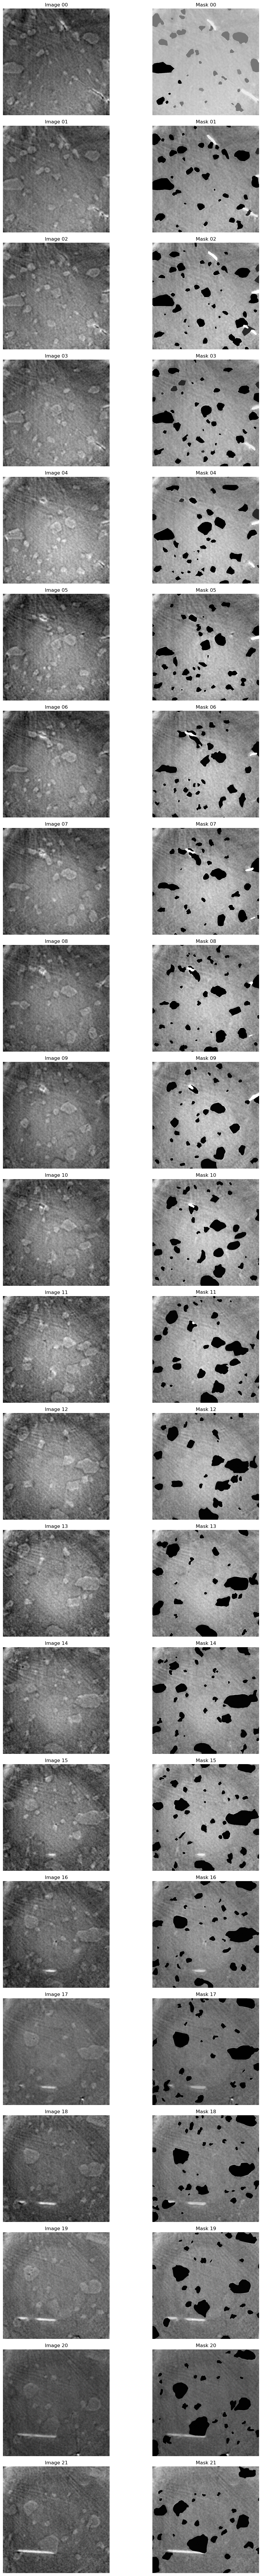

In [25]:

num_to_show = nb_images 
plt.figure(figsize=(12, num_to_show * 4))
cmap = 'gray'

for i in range(num_to_show):
    img = images[i]
    mask = masks[i]

    plt.subplot(num_to_show, 2, 2 * i + 1)
    plt.imshow(img, cmap)
    plt.title(f"Image {i:02d}")
    plt.axis('off')

    plt.subplot(num_to_show, 2, 2 * i + 2)
    plt.imshow(mask, cmap)
    plt.title(f"Mask {i:02d}")
    plt.axis('off')

plt.tight_layout()
plt.show()

